In [1]:
!pip3 install plotly
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy import exp
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.simplefilter('ignore')

In [2]:
init_notebook_mode(connected=False)

In [3]:
winners = {
    'democrat': [1976, 1992, 1996, 2008, 2012],
    'republican': [1980, 1984, 1988, 2000, 2004, 2016]
}
parties = ['democrat', 'republican']

In [4]:
pop_cand = pd.read_csv("1976-2016-president.csv")
pop_cand = pop_cand[pop_cand['writein'] == False]
pop_cand = pop_cand.drop(columns=['office','version', 'notes', 'state_cen', 'state_ic', 'writein'], axis=0)
pop_cand = pop_cand.dropna(axis=0)
pop_cand.head(20)

year       state state_po  state_fips                  candidate  \
0   1976     Alabama       AL           1              Carter, Jimmy   
1   1976     Alabama       AL           1               Ford, Gerald   
2   1976     Alabama       AL           1             Maddox, Lester   
3   1976     Alabama       AL           1    Bubar, Benjamin ""Ben""   
4   1976     Alabama       AL           1                  Hall, Gus   
5   1976     Alabama       AL           1            Macbride, Roger   
7   1976      Alaska       AK           2               Ford, Gerald   
8   1976      Alaska       AK           2              Carter, Jimmy   
9   1976      Alaska       AK           2            Macbride, Roger   
11  1976     Arizona       AZ           4               Ford, Gerald   
12  1976     Arizona       AZ           4              Carter, Jimmy   
13  1976     Arizona       AZ           4  McCarthy, Eugene ""Gene""   
14  1976     Arizona       AZ           4            Macbride, Roger   
15  1976     Arizona       AZ           4              Camejo, Peter   
16  1976     Arizona       AZ           4        Anderson, Thomas J.   
17  1976     Arizona       AZ           4             Maddox, Lester   
19  1976    Arkansas       AR           5              Carter, Jimmy   
20  1976    Arkansas       AR           5               Ford, Gerald   
22  1976    Arkansas       AR           5             Maddox, Lester   
23  1976  California       CA           6               Ford, Gerald   

                         party  candidatevotes  totalvotes  
0                     democrat          659170     1182850  
1                   republican          504070     1182850  
2   american independent party            9198     1182850  
3                  prohibition            6669     1182850  
4          communist party use            1954     1182850  
5                  libertarian            1481     1182850  
7                   republican           71555      123574  
8                     democrat           44058      123574  
9                  libertarian            6785      123574  
11                  republican          418642      742719  
12                    democrat          295602      742719  
13                 independent           19229      742719  
14                 libertarian            7647      742719  
15           socialist workers             928      742719  
16                    american             564      742719  
17  american independent party              85      742719  
19                    democrat          498604      767535  
20                  republican          267903      767535  
22  american independent party             389      767535  
23                  republican         3882244     7803770

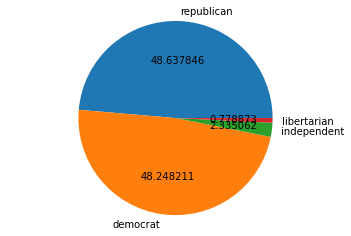

In [5]:
years = pop_cand.groupby(['party'], as_index=False).agg({'candidatevotes': 'sum'})
years = years.sort_values(by = ['candidatevotes'], ascending=False).head(4)
fig, ax = plt.subplots()
ax.pie(years['candidatevotes'], labels = years['party'], autopct = "%f")
ax.axis('equal')
plt.show()

In [6]:
pop_cand = pop_cand[pop_cand['party'].isin(parties)]

In [7]:
fips = {"01": "Alabama",
        "02": "Alaska",
        "04": "Arizona",
        "05": "Arkansas",
        "06": "California",
        "08": "Colorado",
        "09": "Connecticut",
        "10": "Delaware",
        "11": "District of Columbia",
        "12": "Florida",
        "13": "Georgia",
        "15": "Hawaii",
        "16": "Idaho",
        "17": "Illinois",
        "18": "Indiana",
        "19": "Iowa",
        "20": "Kansas",
        "21": "Kentucky",
        "22": "Louisiana",
        "23": "Maine",
        "24": "Maryland",
        "25": "Massachusetts",
        "26": "Michigan",
        "27": "Minnesota",
        "28": "Mississippi",
        "29": "Missouri",
        "30": "Montana",
        "31": "Nebraska",
        "32": "Nevada",
        "33": "New Hampshire",
        "34": "New Jersey",
        "35": "New Mexico",
        "36": "New York",
        "37": "North Carolina",
        "38": "North Dakota",
        "39": "Ohio",
        "40": "Oklahoma",
        "41": "Oregon",
        "42": "Pennsylvania",
        "44": "Rhode Island",
        "45": "South Carolina",
        "46": "South Dakota",
        "47": "Tennessee",
        "48": "Texas",
        "49": "Utah",
        "50": "Vermont",
        "51": "Virginia",
        "53": "Washington",
        "54": "West Virginia",
        "55": "Wisconsin",
        "56": "Wyoming"
       }
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
states = {
        'AK': 'Other',
        'AL': 'South',
        'AR': 'South',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'NorthEast',
        'DC': 'NorthEast',
        'DE': 'NorthEast',
        'FL': 'South',
        'GA': 'South',
        'HI': 'Other',
        'IA': 'MidWest',
        'ID': 'West',
        'IL': 'MidWest',
        'IN': 'MidWest',
        'KS': 'MidWest',
        'KY': 'South',
        'LA': 'South',
        'MA': 'NorthEast',
        'MD': 'NorthEast',
        'ME': 'NorthEast',
        'MI': 'West',
        'MN': 'MidWest',
        'MO': 'MidWest',
        'MS': 'South',
        'MT': 'West',
        'NC': 'South',
        'ND': 'MidWest',
        'NE': 'West',
        'NH': 'NorthEast',
        'NJ': 'NorthEast',
        'NM': 'West',
        'NV': 'West',
        'NY': 'NorthEast',
        'OH': 'MidWest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'NorthEast',
        'RI': 'NorthEast',
        'SC': 'South',
        'SD': 'MidWest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VT': 'NorthEast',
        'WA': 'West',
        'WI': 'MidWest',
        'WV': 'South',
        'WY': 'West'
}
def fips_to_state(fips_id):
    fips_id = fips_id[:2]
    return fips[fips_id] if fips_id in fips else 'NaN'

In [8]:
race1980s = pd.read_excel("race-1980s.xls")
race1980s.columns = race1980s.iloc[0]
race1980s = race1980s[1:]
race1980s['gender'] = race1980s['Race/Sex Indicator'].apply(lambda x: 'Female' if 'female' in x else 'Male')
race1980s['Race/Sex Indicator'] = race1980s['Race/Sex Indicator'].apply(lambda x: x.split()[0])

In [9]:
cols = list(race1980s.columns[3:-1])
race1980s['total'] = race1980s[cols].sum(1)
race1980s = race1980s.drop(cols, 1)
race1980s['FIPS State and County Codes'] = race1980s.apply(lambda x: fips_to_state(x['FIPS State and County Codes']), axis =1)
race1980s.columns = ['year', 'state', 'race', 'gender', 'total']

In [10]:
race1980s = race1980s[race1980s['state'] != 'NaN']
race1980s = race1980s.groupby(['year', 'state', 'race', 'gender'], as_index=False).agg({'total': 'sum'})
race1980s

year    state   race  gender      total
0    1980  Alabama  Black  Female   533376.0
1    1980  Alabama  Black    Male   462447.0
2    1980  Alabama  Other  Female     9992.0
3    1980  Alabama  Other    Male     8496.0
4    1980  Alabama  White  Female  1482088.0
..    ...      ...    ...     ...        ...
913  1988  Wyoming  Black    Male     2025.0
914  1988  Wyoming  Other  Female     6203.0
915  1988  Wyoming  Other    Male     5883.0
916  1988  Wyoming  White  Female   223558.0
917  1988  Wyoming  White    Male   225730.0

[918 rows x 5 columns]

In [11]:
race1970s = pd.read_excel('race-1970s.xlsx')
race1970s.columns = race1970s.iloc[0]
race1970s = race1970s[1:]
race1970s = race1970s.drop('FIPS State Code', axis = 1)
race1970s = race1970s[(race1970s['Year of Estimate'] == '1976')]
race1970s['gender'] = race1970s['Race/Sex Indicator'].apply(lambda x: 'Female' if 'female' in x else 'Male')
race1970s['Race/Sex Indicator'] = race1970s['Race/Sex Indicator'].apply(lambda x: x.split()[0])
race1970s['Year of Estimate'] = race1970s['Year of Estimate'].apply(lambda x: int(x))

In [12]:
cols = list(race1970s.columns[3:-1])
race1970s['total'] = race1970s[cols].sum(1)
race1970s = race1970s.drop(cols, 1)
race1970s.columns = ['year', 'state', 'race', 'gender', 'total']

In [13]:
race1970s

year    state   race  gender      total
1837  1976  Alabama  White    Male  1347662.0
1838  1976  Alabama  White  Female  1420902.0
1839  1976  Alabama  Black    Male   445145.0
1840  1976  Alabama  Black  Female   510487.0
1841  1976  Alabama  Other    Male     5927.0
...    ...      ...    ...     ...        ...
2138  1976  Wyoming  White  Female   188885.0
2139  1976  Wyoming  Black    Male     1741.0
2140  1976  Wyoming  Black  Female     1349.0
2141  1976  Wyoming  Other    Male     3697.0
2142  1976  Wyoming  Other  Female     3793.0

[306 rows x 5 columns]

In [14]:
race1992 = pd.read_excel('race-1990s-present.xls')
race1992 = race1992[race1992['Notes'] != 'Total']
race1992 = race1992.drop(['Notes', 'Yearly July 1st Estimates Code', 'State Code', 'Race Code', 'Gender Code'], axis=1)
race1992 = race1992.dropna()
race1992

State  Gender                              Race  \
0     Alabama  Female  American Indian or Alaska Native   
1     Alabama  Female  American Indian or Alaska Native   
2     Alabama  Female  American Indian or Alaska Native   
3     Alabama  Female  American Indian or Alaska Native   
4     Alabama  Female  American Indian or Alaska Native   
...       ...     ...                               ...   
3409  Wyoming    Male                             White   
3410  Wyoming    Male                             White   
3411  Wyoming    Male                             White   
3412  Wyoming    Male                             White   
3413  Wyoming    Male                             White   

      Yearly July 1st Estimates  Population  
0                        1992.0        8701  
1                        1996.0       10317  
2                        2000.0       12506  
3                        2004.0       14341  
4                        2008.0       16513  
...                         ...         ...  
3409                     2000.0      238348  
3410                     2004.0      245853  
3411                     2008.0      264369  
3412                     2012.0      277279  
3413                     2016.0      280530  

[2856 rows x 5 columns]

In [15]:
race1992['Race'] = race1992['Race'].apply(lambda x: x if 'Indian' not in x and 'Asian' not in x else 'Other')
race1992['Race'] = race1992['Race'].apply(lambda x: x if 'American' not in x else 'Black')
race1992.columns = ['state', 'gender', 'race', 'year', 'total']
race1992 = race1992.groupby(['year', 'state', 'race', 'gender'], as_index = False).agg({'total': 'sum'})
race1992

year    state   race  gender    total
0     1992.0  Alabama  Black  Female   571306
1     1992.0  Alabama  Black    Male   489321
2     1992.0  Alabama  Other  Female    21547
3     1992.0  Alabama  Other    Male    20160
4     1992.0  Alabama  White  Female  1567806
...      ...      ...    ...     ...      ...
2137  2016.0  Wyoming  Black    Male     5705
2138  2016.0  Wyoming  Other  Female    12355
2139  2016.0  Wyoming  Other    Male    12162
2140  2016.0  Wyoming  White  Female   269349
2141  2016.0  Wyoming  White    Male   280530

[2142 rows x 5 columns]

In [16]:
socioeconomic = pd.concat([race1970s, race1980s, race1992], ignore_index = True)
socioeconomic

year    state   race  gender      total
0     1976.0  Alabama  White    Male  1347662.0
1     1976.0  Alabama  White  Female  1420902.0
2     1976.0  Alabama  Black    Male   445145.0
3     1976.0  Alabama  Black  Female   510487.0
4     1976.0  Alabama  Other    Male     5927.0
...      ...      ...    ...     ...        ...
3361  2016.0  Wyoming  Black    Male     5705.0
3362  2016.0  Wyoming  Other  Female    12355.0
3363  2016.0  Wyoming  Other    Male    12162.0
3364  2016.0  Wyoming  White  Female   269349.0
3365  2016.0  Wyoming  White    Male   280530.0

[3366 rows x 5 columns]

In [17]:
poverty = pd.read_excel("poverty-by-state.xlsx")
poverty.columns = ['state', 'year', 'total', 'poor', 'percent']
poverty = poverty[1:]
poverty['percent'] = poverty['percent'] / 100
poverty

state  year  total  poor percent
1          Alabama  2016   4806   723    0.15
2           Alaska  2016    717   103   0.144
3          Arizona  2016   6990   926   0.132
4         Arkansas  2016   2924   432   0.148
5       California  2016  39237  4872   0.124
..             ...   ...    ...   ...     ...
557       Virginia  1976   5204   647   0.124
558     Washington  1976   4223   538   0.127
559  West Virginia  1976   1952   297   0.152
560      Wisconsin  1976   4724   403   0.085
561        Wyoming  1976    468    49   0.104

[561 rows x 5 columns]

In [18]:
state_voted_for = pop_cand.copy(deep = True)
state_voted_for = state_voted_for.groupby(['year', 'state']).agg({'candidatevotes': 'max', 'party': 'first'}).reset_index().drop('candidatevotes', axis=1)

In [19]:
socioeconomic['ragender'] = socioeconomic['race'] + socioeconomic['gender']
socioeconomic = socioeconomic.drop(['race', 'gender'], axis = 1)

In [20]:
socioeconomic = socioeconomic.pivot(columns = ['ragender'], values = ['total'], index = ['year', 'state'])
socioeconomic = socioeconomic.reset_index(level = [0, 1])
socioeconomic.columns = socioeconomic.columns.map(''.join)
socioeconomic.columns = ['year', 'state', 'BlackFemale', 'BlackMale', 'OtherFemale', 'OtherMale', 'WhiteFemale', 'WhiteMale']
socioeconomic

year          state  BlackFemale  BlackMale  OtherFemale  OtherMale  \
0    1976.0        Alabama     510487.0   445145.0       6915.0     5927.0   
1    1976.0         Alaska       5757.0     7413.0      34292.0    35134.0   
2    1976.0        Arizona      32258.0    34327.0      76195.0    72216.0   
3    1976.0       Arkansas     192443.0   170722.0       6062.0     5364.0   
4    1976.0     California     845847.0   808672.0     578346.0   570557.0   
..      ...            ...          ...        ...          ...        ...   
556  2016.0       Virginia     903868.0   836060.0     342452.0   314307.0   
557  2016.0     Washington     175635.0   200788.0     479073.0   440838.0   
558  2016.0  West Virginia      34468.0    40188.0      11346.0    10737.0   
559  2016.0      Wisconsin     212928.0   206670.0     128193.0   124037.0   
560  2016.0        Wyoming       4114.0     5705.0      12355.0    12162.0   

     WhiteFemale  WhiteMale  
0      1420902.0  1347662.0  
1       144438.0   165964.0  
2      1080988.0  1051986.0  
3       918985.0   875080.0  
4      9701334.0  9429848.0  
..           ...        ...  
556    3025940.0  2987479.0  
557    2992548.0  3005889.0  
558     879595.0   854689.0  
559    2561241.0  2539559.0  
560     269349.0   280530.0  

[561 rows x 8 columns]

In [21]:
socioeconomic = socioeconomic.merge(state_voted_for, on = ['year', 'state'])

In [22]:
socioeconomic['candidatedummy'] = socioeconomic['party'].apply(lambda x: 0 if x == 'democrat' else 1)

In [23]:
poverty.columns = ['state', 'year', 'total_families', 'poor_families', 'percent']
socioeconomic = socioeconomic.merge(poverty, on=['state', 'year'])
socioeconomic

year          state  BlackFemale  BlackMale  OtherFemale  OtherMale  \
0    1976        Alabama     510487.0   445145.0       6915.0     5927.0   
1    1976         Alaska       5757.0     7413.0      34292.0    35134.0   
2    1976        Arizona      32258.0    34327.0      76195.0    72216.0   
3    1976       Arkansas     192443.0   170722.0       6062.0     5364.0   
4    1976     California     845847.0   808672.0     578346.0   570557.0   
..    ...            ...          ...        ...          ...        ...   
556  2016       Virginia     903868.0   836060.0     342452.0   314307.0   
557  2016     Washington     175635.0   200788.0     479073.0   440838.0   
558  2016  West Virginia      34468.0    40188.0      11346.0    10737.0   
559  2016      Wisconsin     212928.0   206670.0     128193.0   124037.0   
560  2016        Wyoming       4114.0     5705.0      12355.0    12162.0   

     WhiteFemale  WhiteMale       party  candidatedummy total_families  \
0      1420902.0  1347662.0    democrat               0           3831   
1       144438.0   165964.0  republican               1            379   
2      1080988.0  1051986.0  republican               1           2774   
3       918985.0   875080.0    democrat               0           2249   
4      9701334.0  9429848.0  republican               1          23748   
..           ...        ...         ...             ...            ...   
556    3025940.0  2987479.0    democrat               0           8249   
557    2992548.0  3005889.0    democrat               0           7431   
558     879595.0   854689.0  republican               1           1794   
559    2561241.0  2539559.0  republican               1           5808   
560     269349.0   280530.0  republican               1            560   

    poor_families percent  
0             810   0.212  
1              36   0.096  
2             354   0.128  
3             484   0.215  
4            2619    0.11  
..            ...     ...  
556           847   0.103  
557           736   0.099  
558           311   0.173  
559           551   0.095  
560            70   0.124  

[561 rows x 13 columns]

In [24]:
# Show distribution of votes by state
parties = ['democrat', 'republican']
misleading = pop_cand.copy(deep=True)
misleading = misleading[misleading['party'].isin(parties)]

In [25]:
outcomes = []
for index, row in misleading.iterrows():
    if row['year'] in winners[row['party']]:
        outcomes.append('W')
    else:
        outcomes.append('L')
misleading['outcome'] = outcomes
misleading = misleading[misleading['outcome'] == 'W']
misleading = misleading.drop('outcome', axis=1)
misleading['win_prop'] = misleading['candidatevotes']/misleading['totalvotes']
misleading

year          state state_po  state_fips         candidate       party  \
0     1976        Alabama       AL           1     Carter, Jimmy    democrat   
8     1976         Alaska       AK           2     Carter, Jimmy    democrat   
12    1976        Arizona       AZ           4     Carter, Jimmy    democrat   
19    1976       Arkansas       AR           5     Carter, Jimmy    democrat   
24    1976     California       CA           6     Carter, Jimmy    democrat   
...    ...            ...      ...         ...               ...         ...   
3705  2016       Virginia       VA          51  Trump, Donald J.  republican   
3711  2016     Washington       WA          53  Trump, Donald J.  republican   
3718  2016  West Virginia       WV          54  Trump, Donald J.  republican   
3723  2016      Wisconsin       WI          55  Trump, Donald J.  republican   
3732  2016        Wyoming       WY          56  Trump, Donald J.  republican   

      candidatevotes  totalvotes  win_prop  
0             659170     1182850  0.557273  
8              44058      123574  0.356531  
12            295602      742719  0.398000  
19            498604      767535  0.649617  
24           3742284     7803770  0.479548  
...              ...         ...       ...  
3705         1769443     3982752  0.444276  
3711         1221747     3317019  0.368327  
3718          489371      713051  0.686306  
3723         1405284     2976150  0.472182  
3732          174419      258788  0.673984  

[560 rows x 9 columns]

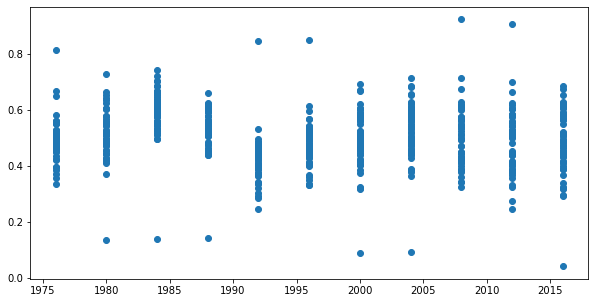

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(misleading['year'], misleading['win_prop'])

<AxesSubplot:xlabel='year', ylabel='win_prop'>

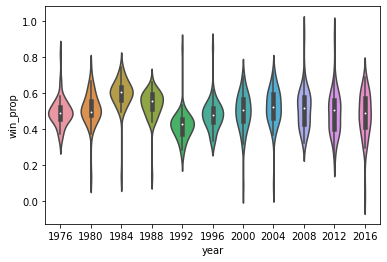

In [27]:
# More centered in earlier years, but states differ by a lot in the future; mention outliers
sns.violinplot(x = misleading['year'], y = misleading['win_prop'])

In [28]:
# Standardize win_proportion
standardize = misleading.groupby('year', as_index = False).agg({'year': 'first', 'win_prop': ['mean', 'std']})
standardize.columns = standardize.columns.map('|'.join).str.strip('|')
standardize

year|first  win_prop|mean  win_prop|std
0         1976       0.494978      0.079144
1         1980       0.513081      0.090927
2         1984       0.597078      0.087330
3         1988       0.536626      0.079213
4         1992       0.420150      0.084765
5         1996       0.479090      0.084874
6         2000       0.495750      0.105584
7         2004       0.522200      0.104293
8         2008       0.512654      0.110086
9         2012       0.488669      0.118361
10        2016       0.482428      0.120885

In [29]:
stand_win_prop = []
outliers = []
for index, row in misleading.iterrows():
    election_year = standardize[standardize['year|first'] == row['year']]
    mean = float(election_year['win_prop|mean'])
    std = float(election_year['win_prop|std'])
    calc = (row['win_prop'] - mean)/std
    stand_win_prop.append(calc)
misleading['stand_win_prop'] = stand_win_prop
misleading

year          state state_po  state_fips         candidate       party  \
0     1976        Alabama       AL           1     Carter, Jimmy    democrat   
8     1976         Alaska       AK           2     Carter, Jimmy    democrat   
12    1976        Arizona       AZ           4     Carter, Jimmy    democrat   
19    1976       Arkansas       AR           5     Carter, Jimmy    democrat   
24    1976     California       CA           6     Carter, Jimmy    democrat   
...    ...            ...      ...         ...               ...         ...   
3705  2016       Virginia       VA          51  Trump, Donald J.  republican   
3711  2016     Washington       WA          53  Trump, Donald J.  republican   
3718  2016  West Virginia       WV          54  Trump, Donald J.  republican   
3723  2016      Wisconsin       WI          55  Trump, Donald J.  republican   
3732  2016        Wyoming       WY          56  Trump, Donald J.  republican   

      candidatevotes  totalvotes  win_prop  stand_win_prop  
0             659170     1182850  0.557273        0.787110  
8              44058      123574  0.356531       -1.749304  
12            295602      742719  0.398000       -1.225340  
19            498604      767535  0.649617        1.953905  
24           3742284     7803770  0.479548       -0.194957  
...              ...         ...       ...             ...  
3705         1769443     3982752  0.444276       -0.315604  
3711         1221747     3317019  0.368327       -0.943885  
3718          489371      713051  0.686306        1.686545  
3723         1405284     2976150  0.472182       -0.084761  
3732          174419      258788  0.673984        1.584616  

[560 rows x 10 columns]

In [30]:
outliers = misleading[(misleading['stand_win_prop'] < -2) | (misleading['stand_win_prop'] > 2)]
outliers

year                 state state_po  state_fips          candidate  \
50    1976  District of Columbia       DC          11      Carter, Jimmy   
60    1976               Georgia       GA          13      Carter, Jimmy   
288   1976                  Utah       UT          49      Carter, Jimmy   
389   1980  District of Columbia       DC          11     Reagan, Ronald   
644   1980                  Utah       UT          49     Reagan, Ronald   
746   1984  District of Columbia       DC          11     Reagan, Ronald   
1062  1988  District of Columbia       DC          11  Bush, George H.W.   
1358  1992  District of Columbia       DC          11      Clinton, Bill   
1618  1992                  Utah       UT          49      Clinton, Bill   
1743  1996  District of Columbia       DC          11      Clinton, Bill   
2101  2000  District of Columbia       DC          11    Bush, George W.   
2466  2004  District of Columbia       DC          11    Bush, George W.   
2785  2008  District of Columbia       DC          11   Obama, Barack H.   
3130  2012  District of Columbia       DC          11   Obama, Barack H.   
3351  2012                  Utah       UT          49   Obama, Barack H.   
3461  2016  District of Columbia       DC          11   Trump, Donald J.   

           party  candidatevotes  totalvotes  win_prop  stand_win_prop  
50      democrat          137818      168830  0.816312        4.060135  
60      democrat          979409     1463152  0.669383        2.203649  
288     democrat          182110      541218  0.336482       -2.002634  
389   republican           23313      173889  0.134068       -4.168306  
644   republican          439687      604152  0.727775        2.361165  
746   republican           29009      211288  0.137296       -5.264901  
1062  republican           27590      192877  0.143045       -4.968663  
1358    democrat          192619      227572  0.846409        5.028742  
1618    democrat          183429      743998  0.246545       -2.048079  
1743    democrat          158220      185726  0.851900        4.392489  
2101  republican           18073      201894  0.089517       -3.847479  
2466  republican           21256      227586  0.093398       -4.111518  
2785    democrat          245800      265853  0.924571        3.741769  
3130    democrat          267070      293764  0.909131        3.552375  
3351    democrat          251813     1017440  0.247497       -2.037603  
3461  republican           12723      312575  0.040704       -3.654094

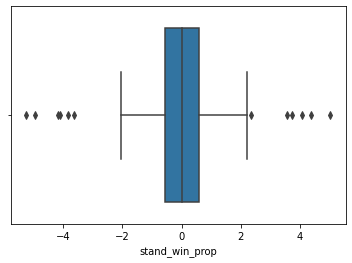

In [31]:
# In general, there is very little deviation between candidates, and the outliers are relatively consistent
plt.figure()
sns.boxplot(x=misleading['stand_win_prop'])
plt.show()
plt.close()

<AxesSubplot:xlabel='year', ylabel='stand_win_prop'>

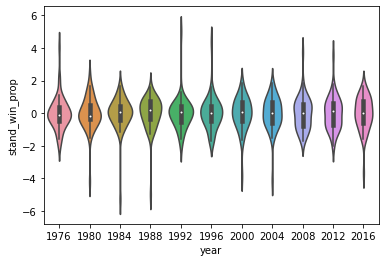

In [32]:
sns.violinplot(x= misleading['year'], y= misleading['stand_win_prop'])

In [33]:
# Which party has been represented the most?
agg_scheme = {
    'candidatevotes': 'max', 
    'candidate': 'first', 
    'party': 'first',
    'win_prop': 'first'
}
wins = pop_cand.copy(deep=True)
wins = wins[wins['party'].isin(parties)]
wins['win_prop'] = wins['candidatevotes'] / wins['totalvotes']
wins = wins.groupby(['year', 'state']).agg(agg_scheme).reset_index(level=(0,1)).drop('candidatevotes', axis=1)
wins

year          state         candidate       party  win_prop
0    1976        Alabama     Carter, Jimmy    democrat  0.557273
1    1976         Alaska      Ford, Gerald  republican  0.579046
2    1976        Arizona      Ford, Gerald  republican  0.563661
3    1976       Arkansas     Carter, Jimmy    democrat  0.649617
4    1976     California      Ford, Gerald  republican  0.497483
..    ...            ...               ...         ...       ...
556  2016       Virginia  Clinton, Hillary    democrat  0.497514
557  2016     Washington  Clinton, Hillary    democrat  0.525387
558  2016  West Virginia  Trump, Donald J.  republican  0.686306
559  2016      Wisconsin  Trump, Donald J.  republican  0.472182
560  2016        Wyoming  Trump, Donald J.  republican  0.673984

[561 rows x 5 columns]

In [34]:
def dummy(party):
    return 1 if party == 'democrat' else 0
wins['dummy'] = wins['party'].apply(dummy)
wins

year          state         candidate       party  win_prop  dummy
0    1976        Alabama     Carter, Jimmy    democrat  0.557273      1
1    1976         Alaska      Ford, Gerald  republican  0.579046      0
2    1976        Arizona      Ford, Gerald  republican  0.563661      0
3    1976       Arkansas     Carter, Jimmy    democrat  0.649617      1
4    1976     California      Ford, Gerald  republican  0.497483      0
..    ...            ...               ...         ...       ...    ...
556  2016       Virginia  Clinton, Hillary    democrat  0.497514      1
557  2016     Washington  Clinton, Hillary    democrat  0.525387      1
558  2016  West Virginia  Trump, Donald J.  republican  0.686306      0
559  2016      Wisconsin  Trump, Donald J.  republican  0.472182      0
560  2016        Wyoming  Trump, Donald J.  republican  0.673984      0

[561 rows x 6 columns]

In [35]:
wins_by_state = wins.groupby('state').agg({'dummy': 'sum'}).reset_index()
wins_by_state['dummy'] = wins_by_state['dummy'] / 11

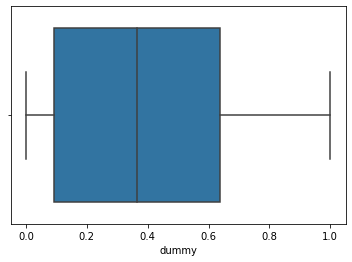

In [36]:
# Biased towards republicans, this makes sense becxause the election year data consisted of republican winners
plt.figure()
sns.boxplot(x = wins_by_state['dummy'])
plt.show()
plt.close()

Text(0, 0.5, 'Standardized Win Proportion')

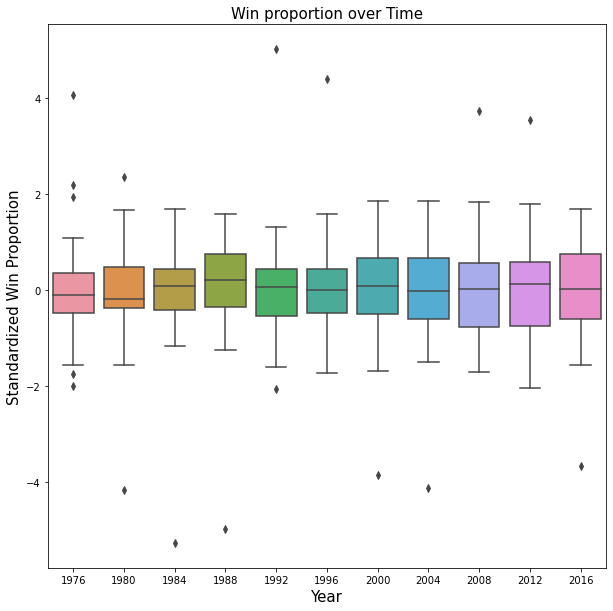

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='year', y='stand_win_prop', data=misleading)
ax.axes.set_title("Win proportion over Time", fontsize=15)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Standardized Win Proportion", fontsize=15)

In [38]:
# This has been based off of popular vote, however, how about the electoral college?
electoral = pd.read_excel("electoral-dist-1900-2016.xlsx")

In [39]:
state = []
years = []
votes = []
merge_electoral = pd.DataFrame()
for index, row in electoral.iterrows():
    for year in np.arange(1900, 2021, 4):
        years.append(year)
        state.append(row['year'])
        votes.append(row[year])
merge_electoral['state'] = state
merge_electoral['year'] = years
merge_electoral['votes'] = votes
merge_electoral

state  year  votes
0     Alabama  1900   11.0
1     Alabama  1904   11.0
2     Alabama  1908   11.0
3     Alabama  1912   12.0
4     Alabama  1916   12.0
...       ...   ...    ...
1576  Wyoming  2004    3.0
1577  Wyoming  2008    3.0
1578  Wyoming  2012    3.0
1579  Wyoming  2016    3.0
1580  Wyoming  2020    3.0

[1581 rows x 3 columns]

In [40]:
def win(party, year, vote):
    if year in winners[party]:
        return vote
    else:
        return 0
agg_scheme = {
    'candidatevotes': 'max', 
    'votes': 'first',
    'totalvotes': 'first',
    'party': 'first'
}
wins_by_state = pop_cand.copy(deep=True)
wins_by_state = wins_by_state.merge(merge_electoral, on=['state', 'year'])
wins_by_state = wins_by_state[wins_by_state['party'].isin(parties)]
wins_by_state = wins_by_state.groupby(['year', 'state']).agg(agg_scheme).reset_index()
wins_by_state

year          state  candidatevotes  votes  totalvotes       party
0    1976        Alabama          659170    9.0     1182850    democrat
1    1976         Alaska           71555    3.0      123574  republican
2    1976        Arizona          418642    6.0      742719  republican
3    1976       Arkansas          498604    6.0      767535    democrat
4    1976     California         3882244   45.0     7803770  republican
..    ...            ...             ...    ...         ...         ...
556  2016       Virginia         1981473   13.0     3982752    democrat
557  2016     Washington         1742718   12.0     3317019    democrat
558  2016  West Virginia          489371    5.0      713051  republican
559  2016      Wisconsin         1405284   10.0     2976150  republican
560  2016        Wyoming          174419    3.0      258788  republican

[561 rows x 6 columns]

In [41]:
won_evotes = []
for index, row in wins_by_state.iterrows():
    won_evotes.append(win(row['party'], row['year'], row['votes']))
wins_by_state['won_evotes'] = won_evotes
wins_by_state['win_prop'] = wins_by_state['candidatevotes'] / wins_by_state['totalvotes'] 
wins_by_state['elec_prop'] = wins_by_state['votes'] / 538
wins_by_state['expected_electoral'] = wins_by_state['win_prop'] * wins_by_state['votes']
wins_by_state

year          state  candidatevotes  votes  totalvotes       party  \
0    1976        Alabama          659170    9.0     1182850    democrat   
1    1976         Alaska           71555    3.0      123574  republican   
2    1976        Arizona          418642    6.0      742719  republican   
3    1976       Arkansas          498604    6.0      767535    democrat   
4    1976     California         3882244   45.0     7803770  republican   
..    ...            ...             ...    ...         ...         ...   
556  2016       Virginia         1981473   13.0     3982752    democrat   
557  2016     Washington         1742718   12.0     3317019    democrat   
558  2016  West Virginia          489371    5.0      713051  republican   
559  2016      Wisconsin         1405284   10.0     2976150  republican   
560  2016        Wyoming          174419    3.0      258788  republican   

     won_evotes  win_prop  elec_prop  expected_electoral  
0           9.0  0.557273   0.016729            5.015454  
1           0.0  0.579046   0.005576            1.737137  
2           0.0  0.563661   0.011152            3.381968  
3           6.0  0.649617   0.011152            3.897704  
4           0.0  0.497483   0.083643           22.386741  
..          ...       ...        ...                 ...  
556         0.0  0.497514   0.024164            6.467676  
557         0.0  0.525387   0.022305            6.304642  
558         5.0  0.686306   0.009294            3.431529  
559        10.0  0.472182   0.018587            4.721818  
560         3.0  0.673984   0.005576            2.021952  

[561 rows x 10 columns]

In [42]:
agg_scheme = {
    'won_evotes': 'sum', 
    'candidatevotes': 'sum', 
    'totalvotes': 'sum', 
    'expected_electoral': 'sum'
}
wins_by_year = wins_by_state.groupby(['year']).agg(agg_scheme).reset_index()
wins_by_year['win_prop'] = wins_by_year['candidatevotes'] / wins_by_year['totalvotes'] 
wins_by_year['elec_prop'] = wins_by_year['won_evotes'] / 538
wins_by_year = wins_by_year.drop(['totalvotes', 'candidatevotes'], axis=1)
wins_by_year

year  won_evotes  expected_electoral  win_prop  elec_prop
0   1976       297.0          281.816869  0.519522   0.552045
1   1980       448.0          276.953179  0.511996   0.832714
2   1984       525.0          318.271524  0.586283   0.975836
3   1988       426.0          295.449200  0.545360   0.791822
4   1992       370.0          238.947437  0.442866   0.687732
5   1996       379.0          273.392584  0.507138   0.704461
6   2000       281.0          291.498037  0.537054   0.522305
7   2004       296.0          300.219315  0.552150   0.550186
8   2008       364.0          306.557956  0.565152   0.676580
9   2012       322.0          305.157388  0.560064   0.598513
10  2016       305.0          294.150076  0.541241   0.566914

Text(0.5, 1.0, 'Popular Vote on Electoral Vote from 1976-2016')

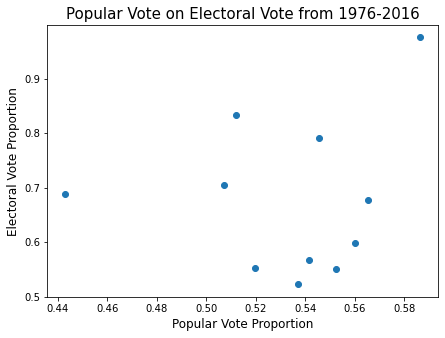

In [43]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(data=wins_by_year, x = 'win_prop', y = 'elec_prop')
ax.set_xlabel('Popular Vote Proportion', fontsize=12)
ax.set_ylabel('Electoral Vote Proportion', fontsize=12)
ax.set_title('Popular Vote on Electoral Vote from 1976-2016', fontsize=15)

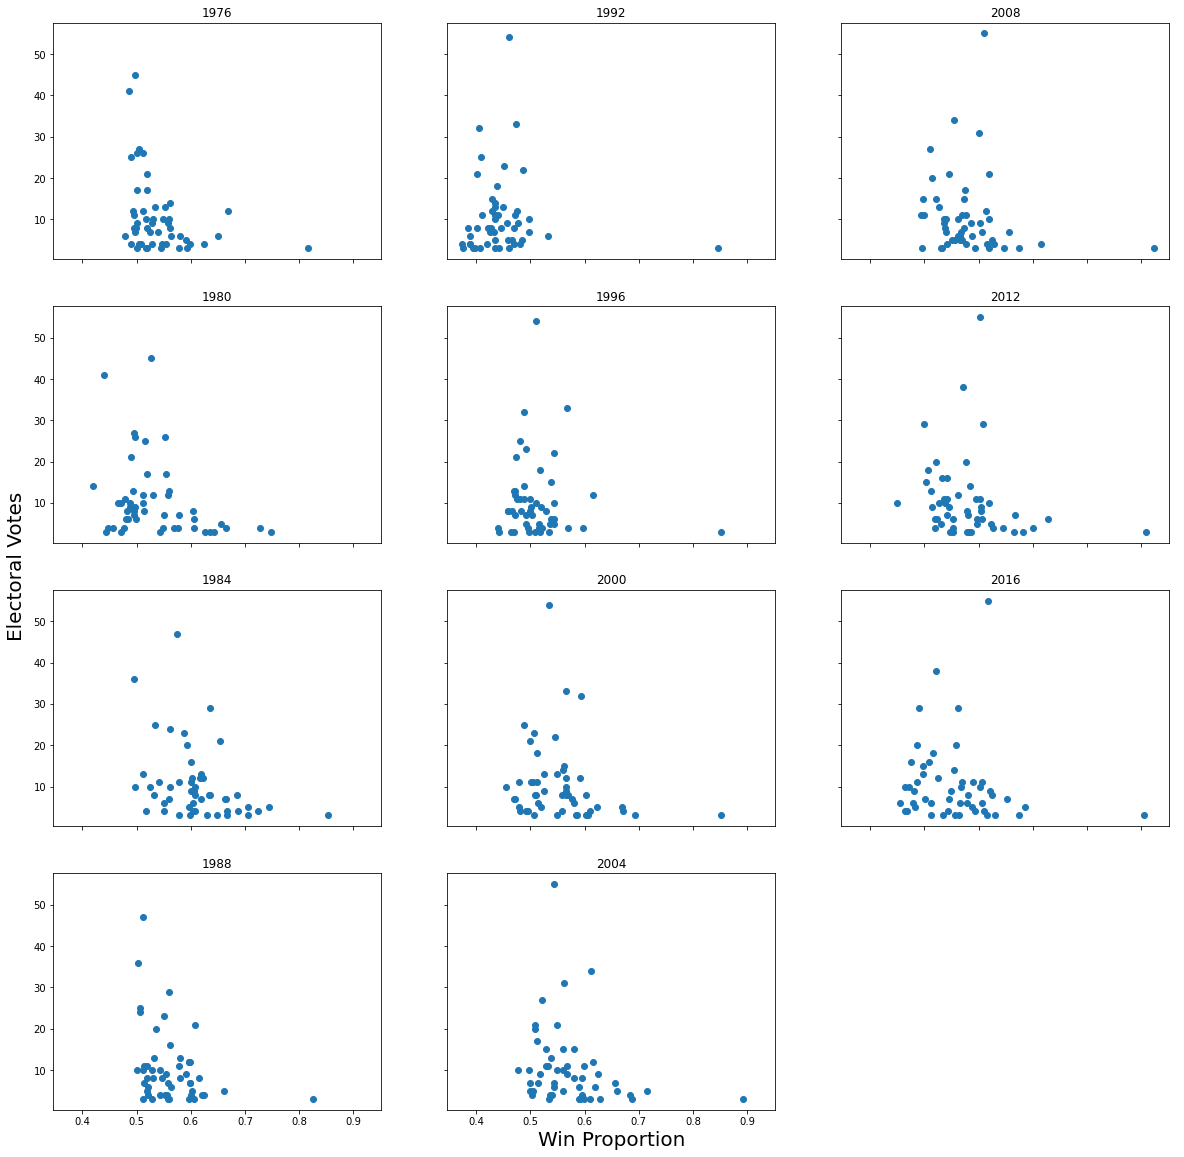

In [44]:
i = 0
j = 0
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

fig.set_figheight(20)
fig.set_figwidth(20)
fig.delaxes(ax[3][2])
plt.xlabel('Win Proportion', fontsize=20)
plt.ylabel('Electoral Votes', fontsize=20)
for year in wins_by_state['year'].unique():
    mini = wins_by_state[wins_by_state['year'] == year].reset_index()
    winner = wins_by_year[wins_by_year['year'] == year].reset_index()
    ax[i][j].scatter(mini['win_prop'], y = mini['votes'])
    ax[i][j].set_title(f'{year}')
    if i == 3:
        j = j + 1
        i = 0
    else:
        i = i + 1

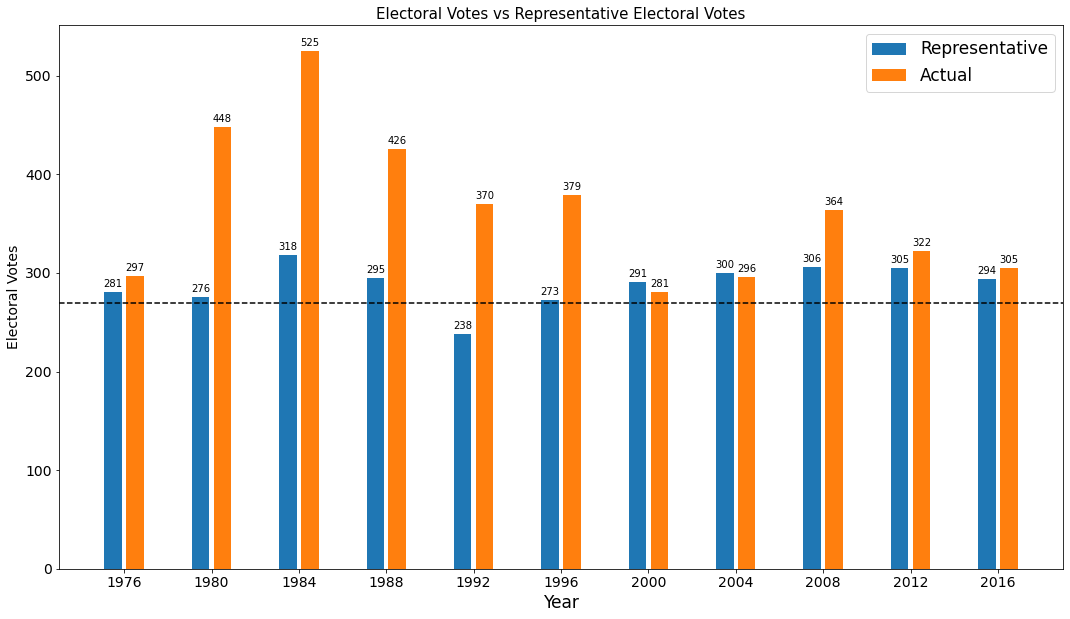

In [45]:
def label(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + .4, height),
                   xytext=(0, 3),
                   textcoords='offset points',
                   ha='center', va='bottom')
def tick_size(ticks):
    for tick in ticks:
        tick.label.set_fontsize(14)

wins_by_year['round_exp'] = wins_by_year['expected_electoral'].apply(lambda x: int(x))
wins_by_year['round_act'] = wins_by_year['won_evotes'].apply(lambda x: int(x))
fig, ax = plt.subplots(figsize=(18,10))
rep = ax.bar(x=wins_by_year['year'] - .5, height=wins_by_year['round_exp'], label='Representative')
act = ax.bar(x=wins_by_year['year'] + .5, height=wins_by_year['round_act'], label='Actual')

ax.set_xticks(ticks=np.arange(1976, 2017, 4))
label(rep)
label(act)
tick_size(ax.xaxis.get_major_ticks())
tick_size(ax.yaxis.get_major_ticks())
ax.axhline(y=270, ls='--', c='black')

ax.set_xlabel('Year', fontsize=17)
ax.set_ylabel('Electoral Votes', fontsize=14)
ax.set_title('Electoral Votes vs Representative Electoral Votes', fontsize=15)
ax.legend(loc='upper right', fontsize=17)

In [46]:
soc_reg = wins_by_state[['year', 'state','win_prop']].merge(socioeconomic, on=['year','state'])

In [47]:
soc_reg['region'] = soc_reg['state'].apply(lambda x: states[us_state_abbrev[x]])
soc_reg

year          state  win_prop  BlackFemale  BlackMale  OtherFemale  \
0    1976        Alabama  0.557273     510487.0   445145.0       6915.0   
1    1976         Alaska  0.579046       5757.0     7413.0      34292.0   
2    1976        Arizona  0.563661      32258.0    34327.0      76195.0   
3    1976       Arkansas  0.649617     192443.0   170722.0       6062.0   
4    1976     California  0.497483     845847.0   808672.0     578346.0   
..    ...            ...       ...          ...        ...          ...   
556  2016       Virginia  0.497514     903868.0   836060.0     342452.0   
557  2016     Washington  0.525387     175635.0   200788.0     479073.0   
558  2016  West Virginia  0.686306      34468.0    40188.0      11346.0   
559  2016      Wisconsin  0.472182     212928.0   206670.0     128193.0   
560  2016        Wyoming  0.673984       4114.0     5705.0      12355.0   

     OtherMale  WhiteFemale  WhiteMale       party  candidatedummy  \
0       5927.0    1420902.0  1347662.0    democrat               0   
1      35134.0     144438.0   165964.0  republican               1   
2      72216.0    1080988.0  1051986.0  republican               1   
3       5364.0     918985.0   875080.0    democrat               0   
4     570557.0    9701334.0  9429848.0  republican               1   
..         ...          ...        ...         ...             ...   
556   314307.0    3025940.0  2987479.0    democrat               0   
557   440838.0    2992548.0  3005889.0    democrat               0   
558    10737.0     879595.0   854689.0  republican               1   
559   124037.0    2561241.0  2539559.0  republican               1   
560    12162.0     269349.0   280530.0  republican               1   

    total_families poor_families percent   region  
0             3831           810   0.212    South  
1              379            36   0.096    Other  
2             2774           354   0.128     West  
3             2249           484   0.215    South  
4            23748          2619    0.11     West  
..             ...           ...     ...      ...  
556           8249           847   0.103    South  
557           7431           736   0.099     West  
558           1794           311   0.173    South  
559           5808           551   0.095  MidWest  
560            560            70   0.124     West  

[561 rows x 15 columns]

In [48]:
agg_scheme = {
    'BlackFemale': 'sum',
    'BlackMale': 'sum',
    'WhiteFemale': 'sum',
    'WhiteMale': 'sum',
    'OtherFemale': 'sum',
    'OtherMale': 'sum'
}
soc_reg.groupby(['year', 'party'], as_index=False).agg(agg_scheme)

year       party  BlackFemale   BlackMale  WhiteFemale   WhiteMale  \
0   1976    democrat    9206094.0   8197168.0   54180585.0  51179342.0   
1   1976  republican    3919331.0   3629082.0   42369772.0  40858297.0   
2   1980    democrat    2977514.0   2581647.0   15057896.0  14073121.0   
3   1980  republican   11140735.0  10072968.0   84955310.0  81093074.0   
4   1984    democrat     269218.0    234151.0    2141441.0   2044632.0   
5   1984  republican   14609926.0  13101423.0  100611599.0  95905683.0   
6   1988    democrat    2326435.0   2057782.0   21202134.0  19980978.0   
7   1988  republican   13342517.0  12000461.0   84137479.0  80801935.0   
8   1992    democrat   11029700.0   9908868.0   76416023.0  73370211.0   
9   1992  republican    5795971.0   5245443.0   32627332.0  31532056.0   
10  1996    democrat   11788251.0  10654066.0   81847223.0  78843021.0   
11  1996  republican    6296609.0   5676552.0   31220242.0  30509564.0   
12  2000    democrat    8189839.0   7390232.0   56040763.0  54320685.0   
13  2000  republican   11063135.0  10085503.0   60809369.0  59376148.0   
14  2004    democrat    8409765.0   7598421.0   55058452.0  53582855.0   
15  2004  republican   11867564.0  10863048.0   64699232.0  63329495.0   
16  2008    democrat   13717120.0  12554290.0   84933872.0  82893975.0   
17  2008  republican    7728896.0   7048653.0   37864032.0  37274500.0   
18  2012    democrat   12665006.0  11656452.0   77253512.0  75545650.0   
19  2012  republican    9862906.0   9029485.0   48031997.0  47252876.0   
20  2016    democrat    8734763.0   8094760.0   53792923.0  53034589.0   
21  2016  republican   14811634.0  13625595.0   73630425.0  72147830.0   

    OtherFemale  OtherMale  
0      795234.0   768043.0  
1     1250591.0  1211085.0  
2      596237.0   578092.0  
3     2098662.0  2000570.0  
4       52450.0    49201.0  
5     3470601.0  3335219.0  
6     1094473.0  1064566.0  
7     3310849.0  3180167.0  
8     4279709.0  4120309.0  
9     1118343.0  1070259.0  
10    5229840.0  4962479.0  
11    1204635.0  1161802.0  
12    5228805.0  4978139.0  
13    2387093.0  2292700.0  
14    5911831.0  5563068.0  
15    3030442.0  2891125.0  
16    8261512.0  7694905.0  
17    2098583.0  2023628.0  
18    8755053.0  8107883.0  
19    2888119.0  2782051.0  
20    8579356.0  7942931.0  
21    4370425.0  4176080.0

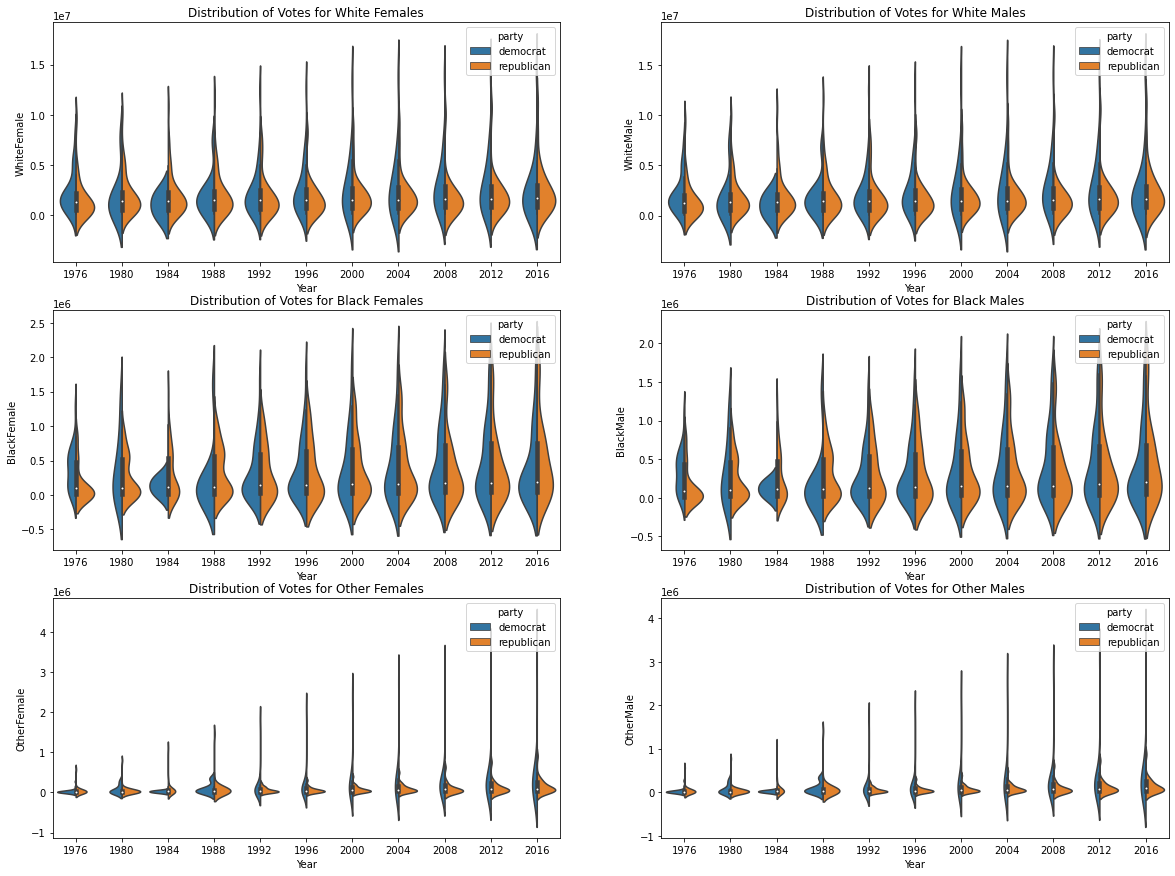

In [49]:
def split(group):
    return re.sub(r"(\w)([A-Z])", r"\1 \2", group)
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
cols =[['WhiteFemale', 'WhiteMale'], ['BlackFemale', 'BlackMale'], ['OtherFemale', 'OtherMale']]
i = 0
j = 0
while j < 2:
    plot = sns.violinplot(ax=ax[i][j], x='year', y=cols[i][j], hue='party', data=soc_reg, split=True)
    plot.set_title(f'Distribution of Votes for {split(cols[i][j])}s')
    plot.set_xlabel('Year')
    if i == 2:
        i = 0
        j = j + 1
    else:
        i = i + 1

In [50]:
for i, row in wins_by_state.iterrows():
    wins_by_state.loc[i, 'state_code'] = us_state_abbrev[row['state']]

wins_by_state['party_class'] = list(map(lambda x: 0 if x == 'republican' else 1, wins_by_state['party']))
wins_by_state = wins_by_state[(wins_by_state['state'] != 'District of Columbia')]

wins_by_state['black_female'] = socioeconomic['BlackFemale']
wins_by_state['black_male'] = socioeconomic['BlackMale']
wins_by_state['other_female'] = socioeconomic['OtherFemale']
wins_by_state['other_male'] = socioeconomic['OtherMale']
wins_by_state['white_female'] = socioeconomic['WhiteFemale']
wins_by_state['white_male'] = socioeconomic['WhiteMale']

In [51]:
wins_by_state

year          state  candidatevotes  votes  totalvotes       party  \
0    1976        Alabama          659170    9.0     1182850    democrat   
1    1976         Alaska           71555    3.0      123574  republican   
2    1976        Arizona          418642    6.0      742719  republican   
3    1976       Arkansas          498604    6.0      767535    democrat   
4    1976     California         3882244   45.0     7803770  republican   
..    ...            ...             ...    ...         ...         ...   
556  2016       Virginia         1981473   13.0     3982752    democrat   
557  2016     Washington         1742718   12.0     3317019    democrat   
558  2016  West Virginia          489371    5.0      713051  republican   
559  2016      Wisconsin         1405284   10.0     2976150  republican   
560  2016        Wyoming          174419    3.0      258788  republican   

     won_evotes  win_prop  elec_prop  expected_electoral state_code  \
0           9.0  0.557273   0.016729            5.015454         AL   
1           0.0  0.579046   0.005576            1.737137         AK   
2           0.0  0.563661   0.011152            3.381968         AZ   
3           6.0  0.649617   0.011152            3.897704         AR   
4           0.0  0.497483   0.083643           22.386741         CA   
..          ...       ...        ...                 ...        ...   
556         0.0  0.497514   0.024164            6.467676         VA   
557         0.0  0.525387   0.022305            6.304642         WA   
558         5.0  0.686306   0.009294            3.431529         WV   
559        10.0  0.472182   0.018587            4.721818         WI   
560         3.0  0.673984   0.005576            2.021952         WY   

     party_class  black_female  black_male  other_female  other_male  \
0              1      510487.0    445145.0        6915.0      5927.0   
1              0        5757.0      7413.0       34292.0     35134.0   
2              0       32258.0     34327.0       76195.0     72216.0   
3              1      192443.0    170722.0        6062.0      5364.0   
4              0      845847.0    808672.0      578346.0    570557.0   
..           ...           ...         ...           ...         ...   
556            1      903868.0    836060.0      342452.0    314307.0   
557            1      175635.0    200788.0      479073.0    440838.0   
558            0       34468.0     40188.0       11346.0     10737.0   
559            0      212928.0    206670.0      128193.0    124037.0   
560            0        4114.0      5705.0       12355.0     12162.0   

     white_female  white_male  
0       1420902.0   1347662.0  
1        144438.0    165964.0  
2       1080988.0   1051986.0  
3        918985.0    875080.0  
4       9701334.0   9429848.0  
..            ...         ...  
556     3025940.0   2987479.0  
557     2992548.0   3005889.0  
558      879595.0    854689.0  
559     2561241.0   2539559.0  
560      269349.0    280530.0  

[550 rows x 18 columns]

In [52]:
scl = [[0, '#e74c3c'],[1, '#2980b9']] 

In [53]:
def plot_votes_map(arg):
    data_slider = []
    for year in wins_by_state.year.unique():
        df = wins_by_state[(wins_by_state['year'] == year)]
        df['text'] = df['votes']

        by_year = dict(
            type='choropleth',
            locations=df['state_code'],
            z=df[arg].astype(float),
            locationmode='USA-states',
            colorscale=scl,
            text=df['text']
        )

        data_slider.append(by_year)
    
    steps = []
    count = 0
    count = 1976

    for i in range(len(data_slider)):
        step = dict(method='restyle',
                    args=['visible', [False] * len(data_slider)],
                    label='Year {}'.format(count) # label to be displayed for each step (year)
                   ) 
        step['args'][1][i] = True
        steps.append(step)
        count += 4

    sliders = [dict(active=10, pad={"t": 1}, steps=steps)]
    
    layout = dict(
        geo=dict(scope='usa', projection={'type': 'albers usa'}),
        sliders=sliders
    )
    
    fig = dict(data=data_slider, layout=layout)
    plotly.offline.iplot(fig, show_link=False)

In [54]:
plot_votes_map('party_class')

In [55]:
for i, row in pop_cand.iterrows():
    pop_cand.loc[i, 'region'] = states[row['state_po']]

In [56]:
def plot_candidate_votes(data, arg=None):
    fig, ax = plt.subplots(figsize=(16,10))
    plot = sns.violinplot(x='year', y='candidatevotes', hue='party', data=data, split=True)
    if arg:
        plot.set_title(f'Distribution of Votes: {arg}')
    else:
        plot.set_title(f'Distribution of Votes')
    plot.set_xlabel('Year')
    plot.set_ylabel('Candidate Votes')

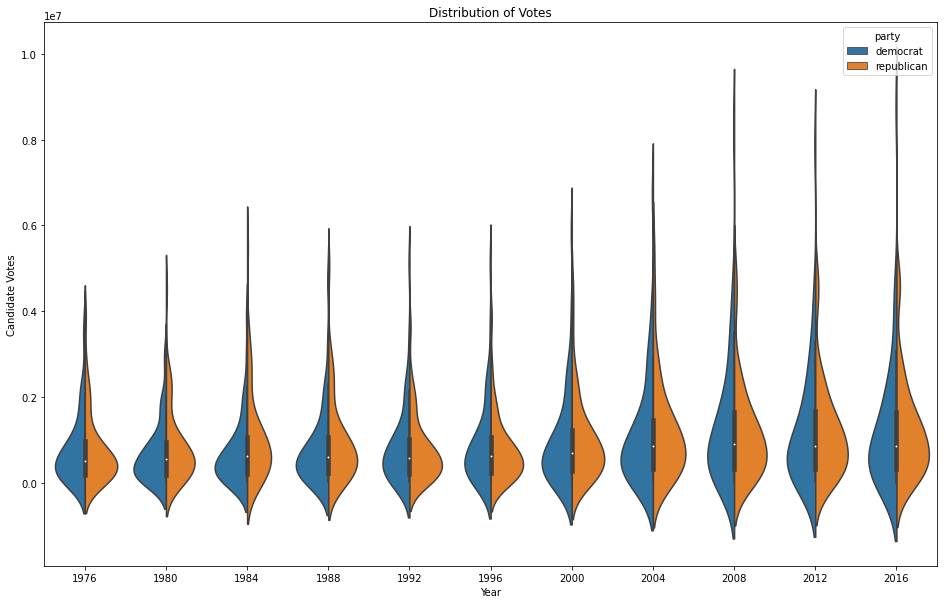

In [57]:
plot_candidate_votes(pop_cand)

In [58]:
south = pop_cand[pop_cand['region'] == 'South']
mid_west = pop_cand[pop_cand['region'] == 'MidWest']
north_east = pop_cand[pop_cand['region'] == 'NorthEast']
west = pop_cand[pop_cand['region'] == 'West']
other = pop_cand[pop_cand['region'] == 'Other']

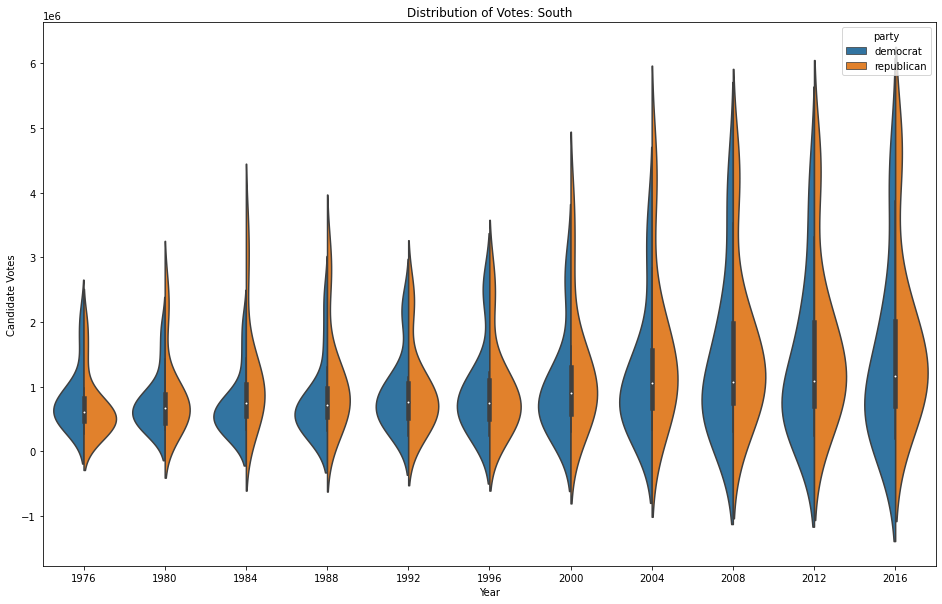

In [59]:
plot_candidate_votes(south, "South")

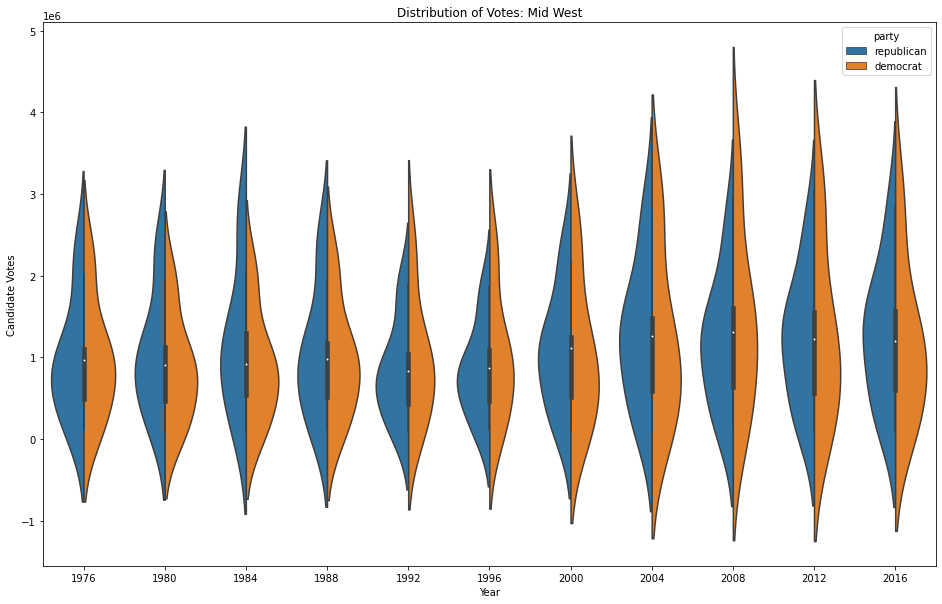

In [60]:
plot_candidate_votes(mid_west, "Mid West")

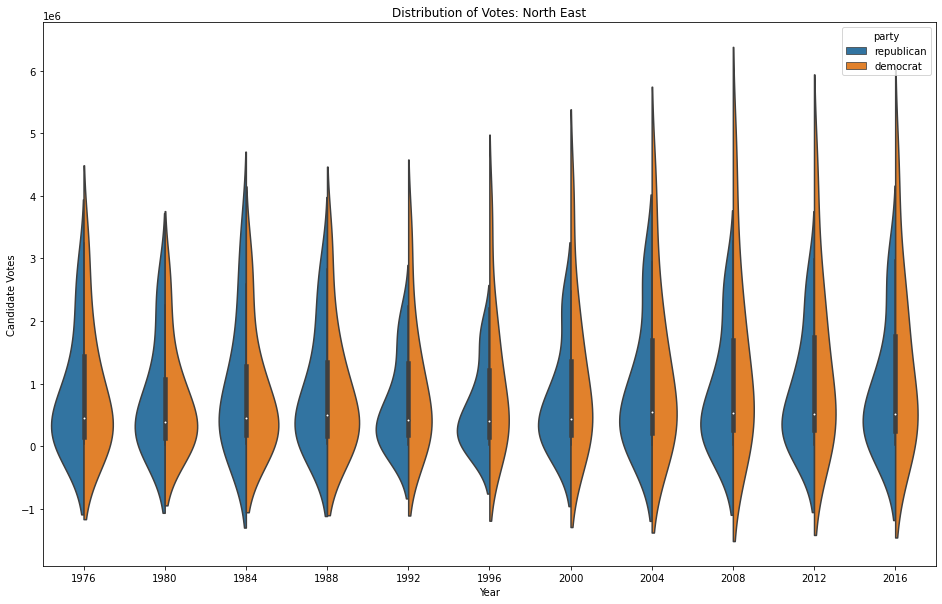

In [61]:
plot_candidate_votes(north_east, "North East")

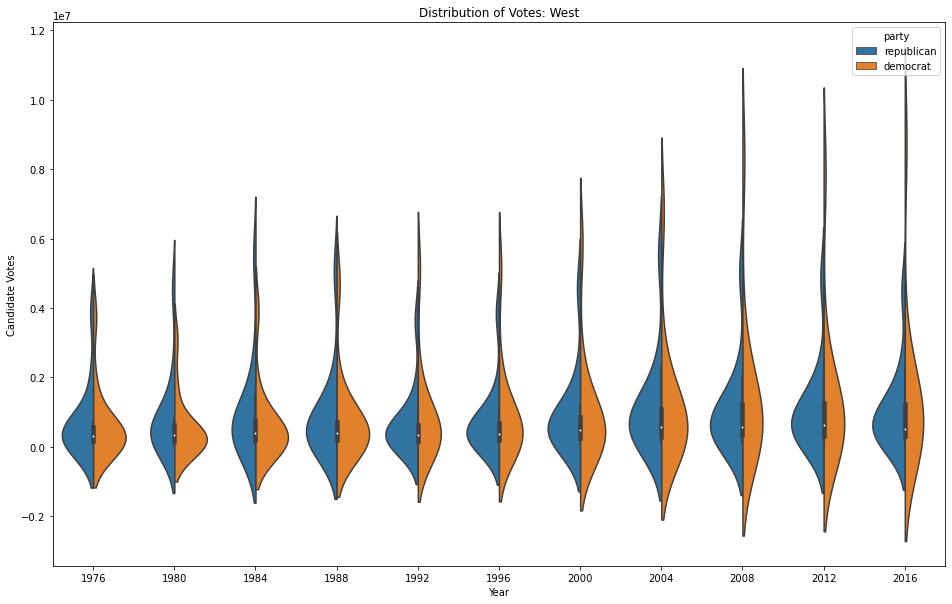

In [62]:
plot_candidate_votes(west, "West")

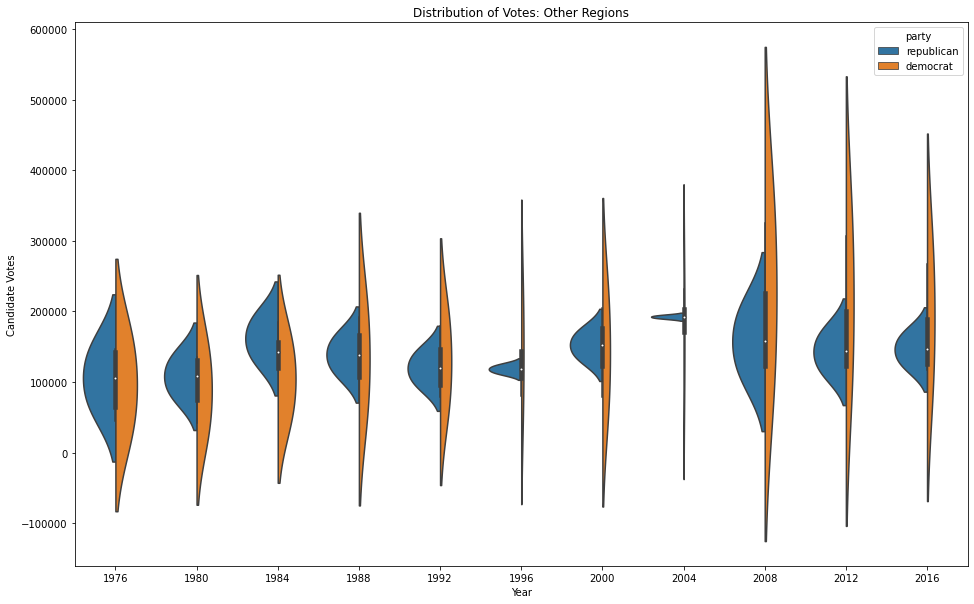

In [63]:
plot_candidate_votes(other, "Other Regions")

In [64]:
race_df = soc_reg
race_df['black'] = race_df['BlackFemale'] + race_df['BlackMale']
race_df['white'] = race_df['WhiteFemale'] + race_df['WhiteMale']
race_df['other'] = race_df['OtherFemale'] + race_df['OtherMale']
race_df = race_df.drop(columns=['candidatedummy', 'total_families', 'poor_families', 'BlackFemale', 'BlackMale', 'WhiteFemale', 'WhiteMale', 'OtherFemale', 'OtherMale'])
race_df['party_class'] = list(map(lambda x: 0 if x == 'republican' else 1, race_df['party']))
for i, row in race_df.iterrows():
    race_df.loc[i, 'state_code'] = us_state_abbrev[row['state']]

In [65]:
race_df.nlargest(10, ['black'])

year     state  win_prop       party percent     region      black  \
553  2016     Texas  0.522347  republican   0.134      South  3638427.0   
542  2016  New York  0.561361    democrat   0.134  NorthEast  3631433.0   
519  2016   Florida  0.490219  republican   0.137      South  3598428.0   
491  2012  New York  0.607610    democrat   0.173  NorthEast  3583150.0   
440  2008  New York  0.601570    democrat    0.16  NorthEast  3473867.0   
389  2004  New York  0.561306    democrat    0.14  NorthEast  3464246.0   
338  2000  New York  0.566393    democrat    0.14  NorthEast  3443462.0   
520  2016   Georgia  0.507713  republican   0.133      South  3381419.0   
468  2012   Florida  0.500079    democrat   0.148      South  3324305.0   
287  1996  New York  0.566789    democrat   0.167  NorthEast  3314224.0   

          white      other  party_class state_code  
553  22485942.0  1790041.0            0         TX  
542  13982801.0  2019194.0            1         NY  
519  16235250.0   779799.0            0         FL  
491  14119939.0  1869843.0            1         NY  
440  14057786.0  1680783.0            1         NY  
389  14222791.0  1484530.0            1         NY  
338  14266524.0  1291794.0            1         NY  
520   6405733.0   514738.0            0         GA  
468  15290539.0   682978.0            1         FL  
287  14195327.0  1078909.0            1         NY

In [66]:
def plot_race_map(arg, r):
    data_slider = []
    for year in wins_by_state.year.unique():
        df = race_df[(race_df['year'] == year)]
        df = df.nlargest(10, [r])
        df['text'] = df[r]

        by_year = dict(
            type='choropleth',
            locations=df['state_code'],
            z=df[arg].astype(float),
            locationmode='USA-states',
            colorscale=scl,
            text=df['text']
        )

        data_slider.append(by_year)
    
    steps = []
    count = 0
    count = 1976

    for i in range(len(data_slider)):
        step = dict(method='restyle',
                    args=['visible', [False] * len(data_slider)],
                    label='Year {}'.format(count) # label to be displayed for each step (year)
                   ) 
        step['args'][1][i] = True
        steps.append(step)
        count += 4

    sliders = [dict(active=10, pad={"t": 1}, steps=steps)]
    
    layout = dict(
        geo=dict(scope='usa', projection={'type': 'albers usa'}),
        sliders=sliders
    )
    
    fig = dict(data=data_slider, layout=layout)
    plotly.offline.iplot(fig, show_link=False)

In [67]:
plot_race_map('party_class', 'black')

In [68]:
plot_race_map('party_class', 'white')

In [69]:
plot_race_map('party_class', 'other')

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [71]:
pop_2019 = pd.read_csv('raw_data_2019.csv')
pop_2019 = pop_2019.head(50)
pop_2019 = pop_2019.replace(np.nan, 0)
pop_2019['other'] = pop_2019['Hispanic'] + pop_2019['Asian'] + pop_2019['American Indian/Alaska Native'] + \
                    pop_2019['Native Hawaiian/Other Pacific Islander'] + pop_2019['Multiple Races']
pop_2019 = pop_2019.drop(columns=[
    'Hispanic',
    'Asian',
    'American Indian/Alaska Native',
    'Native Hawaiian/Other Pacific Islander',
    'Multiple Races',
    'Total'
])
pop_2019 = pop_2019.rename(columns={
    'White': 'white',
    'Black': 'black',
    'Location': 'state'
})
pop_2019['region'] = pop_2019['state'].apply(lambda x: states[us_state_abbrev[x]])
pop_2019

state       white      black       other     region
0          Alabama   3117200.0  1263500.0    384900.0      South
1           Alaska    421100.0    15200.0    265500.0      Other
2          Arizona   3843700.0   306600.0   2947800.0       West
3         Arkansas   2108400.0   444200.0    369900.0      South
4       California  14047400.0  2066300.0  22529000.0       West
5         Colorado   3804100.0   211100.0   1596500.0       West
6      Connecticut   2268200.0   346400.0    837600.0  NorthEast
7         Delaware    577700.0   205100.0    157300.0  NorthEast
8          Florida  11119200.0  3150100.0   6722800.0      South
9          Georgia   5354500.0  3225900.0   1713600.0      South
10          Hawaii    274400.0    16400.0   1052200.0      Other
11           Idaho   1429500.0    11500.0    307900.0       West
12        Illinois   7522700.0  1679900.0   3159800.0    MidWest
13         Indiana   5116000.0   600500.0    793400.0    MidWest
14            Iowa   2610600.0   119200.0    330400.0    MidWest
15          Kansas   2128700.0   153300.0    528400.0    MidWest
16        Kentucky   3648500.0   344900.0    323600.0      South
17       Louisiana   2643900.0  1433000.0    420900.0      South
18           Maine   1213500.0    17800.0     70700.0  NorthEast
19        Maryland   2934100.0  1741500.0   1198300.0  NorthEast
20   Massachusetts   4687000.0   466200.0   1497500.0  NorthEast
21        Michigan   7316400.0  1305100.0   1142500.0       West
22       Minnesota   4361600.0   353700.0    796600.0    MidWest
23     Mississippi   1622400.0  1078300.0    166200.0      South
24        Missouri   4715000.0   667100.0    557800.0    MidWest
25         Montana    895200.0     5900.0    137800.0       West
26        Nebraska   1470900.0    89200.0    312400.0       West
27          Nevada   1448800.0   279000.0   1302000.0       West
28   New Hampshire   1179700.0    17600.0    113900.0  NorthEast
29      New Jersey   4738500.0  1081400.0   2877100.0  NorthEast
30      New Mexico    750000.0    35000.0   1255700.0       West
31        New York  10432200.0  2651600.0   5822300.0  NorthEast
32  North Carolina   6355400.0  2124200.0   1660300.0      South
33    North Dakota    614600.0    17900.0     96900.0    MidWest
34            Ohio   8918300.0  1380000.0   1050000.0    MidWest
35        Oklahoma   2488200.0   262800.0   1075900.0      South
36          Oregon   3097700.0    72900.0    958300.0       West
37    Pennsylvania   9401500.0  1282000.0   1694200.0  NorthEast
38    Rhode Island    717300.0    60300.0    239300.0  NorthEast
39  South Carolina   3177000.0  1307200.0    491900.0      South
40    South Dakota    697500.0    18800.0    134400.0    MidWest
41       Tennessee   4884500.0  1088500.0    665400.0      South
42           Texas  11637100.0  3297200.0  13351800.0      South
43            Utah   2452300.0    32600.0    669100.0       West
44         Vermont    555100.0     6700.0     36200.0  NorthEast
45        Virginia   5017100.0  1543100.0   1624800.0      South
46      Washington   5013200.0   282700.0   2128000.0       West
47   West Virginia   1609000.0    55900.0     74100.0      South
48       Wisconsin   4602500.0   349200.0    722300.0    MidWest
49         Wyoming    471600.0     5400.0     84800.0       West

In [72]:
for i, row in pop_cand.iterrows():
    pop_cand.loc[i, 'party_class'] = 0 if row['party'] == 'republican' else 1

In [73]:
data = soc_reg[soc_reg['state'] != 'District of Columbia']
data = pd.get_dummies(data, columns=['state', 'region'], drop_first=True)
data['black'] = data['BlackFemale'] + data['BlackMale']
data['white'] = data['WhiteFemale'] + data['WhiteMale']
data['other'] = data['OtherFemale'] + data['OtherMale']
data = data.drop(columns=['year', 'party', 'total_families', 'poor_families', 'BlackFemale', 'BlackMale', 'WhiteFemale', 'WhiteMale', 'OtherFemale', 'OtherMale'])
data = data.rename(columns={
    'candidatedummy': 'party_class'
})

In [74]:
X = data.drop(columns=['party_class', 'win_prop', 'percent'])
y = np.array(data["party_class"])

In [75]:
X_test = pd.get_dummies(pop_2019, columns=['state', 'region'], drop_first=True)
clf = DecisionTreeClassifier(criterion="entropy", random_state = 0).fit(X, y)
tree_y_predicted = clf.predict(X_test)

In [76]:
tree_y_predicted

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [77]:
electoral_votes_2016 = wins_by_state[wins_by_state['year'] == 2016]
electoral_votes_2016 = electoral_votes_2016.reset_index()

In [78]:
republican_votes = 0
democrat_votes = 0

for i in range(len(tree_y_predicted)):
    if tree_y_predicted[i] == 0:
        republican_votes += electoral_votes_2016.loc[i, 'votes']
    else:
        democrat_votes += electoral_votes_2016.loc[i, 'votes']
    
print(republican_votes, democrat_votes)

356.0 179.0


In [79]:
soc_reg['total_pop'] = soc_reg['black'] + soc_reg['white'] + soc_reg['other']

In [80]:
total_pop = wins_by_state
total_pop['total_pop'] = soc_reg['total_pop']

In [83]:
total_pop['period_intervals'] = pd.cut(total_pop['year'], 5)
total_pop

year          state  candidatevotes  votes  totalvotes       party  \
0    1976        Alabama          659170    9.0     1182850    democrat   
1    1976         Alaska           71555    3.0      123574  republican   
2    1976        Arizona          418642    6.0      742719  republican   
3    1976       Arkansas          498604    6.0      767535    democrat   
4    1976     California         3882244   45.0     7803770  republican   
..    ...            ...             ...    ...         ...         ...   
556  2016       Virginia         1981473   13.0     3982752    democrat   
557  2016     Washington         1742718   12.0     3317019    democrat   
558  2016  West Virginia          489371    5.0      713051  republican   
559  2016      Wisconsin         1405284   10.0     2976150  republican   
560  2016        Wyoming          174419    3.0      258788  republican   

     won_evotes  win_prop  elec_prop  expected_electoral state_code  \
0           9.0  0.557273   0.016729            5.015454         AL   
1           0.0  0.579046   0.005576            1.737137         AK   
2           0.0  0.563661   0.011152            3.381968         AZ   
3           6.0  0.649617   0.011152            3.897704         AR   
4           0.0  0.497483   0.083643           22.386741         CA   
..          ...       ...        ...                 ...        ...   
556         0.0  0.497514   0.024164            6.467676         VA   
557         0.0  0.525387   0.022305            6.304642         WA   
558         5.0  0.686306   0.009294            3.431529         WV   
559        10.0  0.472182   0.018587            4.721818         WI   
560         3.0  0.673984   0.005576            2.021952         WY   

     party_class  black_female  black_male  other_female  other_male  \
0              1      510487.0    445145.0        6915.0      5927.0   
1              0        5757.0      7413.0       34292.0     35134.0   
2              0       32258.0     34327.0       76195.0     72216.0   
3              1      192443.0    170722.0        6062.0      5364.0   
4              0      845847.0    808672.0      578346.0    570557.0   
..           ...           ...         ...           ...         ...   
556            1      903868.0    836060.0      342452.0    314307.0   
557            1      175635.0    200788.0      479073.0    440838.0   
558            0       34468.0     40188.0       11346.0     10737.0   
559            0      212928.0    206670.0      128193.0    124037.0   
560            0        4114.0      5705.0       12355.0     12162.0   

     white_female  white_male   total_pop   period_intervals  
0       1420902.0   1347662.0   3737038.0  (1975.96, 1984.0]  
1        144438.0    165964.0    392998.0  (1975.96, 1984.0]  
2       1080988.0   1051986.0   2347970.0  (1975.96, 1984.0]  
3        918985.0    875080.0   2168656.0  (1975.96, 1984.0]  
4       9701334.0   9429848.0  21934604.0  (1975.96, 1984.0]  
..            ...         ...         ...                ...  
556     3025940.0   2987479.0   8410106.0   (2008.0, 2016.0]  
557     2992548.0   3005889.0   7294771.0   (2008.0, 2016.0]  
558      879595.0    854689.0   1831023.0   (2008.0, 2016.0]  
559     2561241.0   2539559.0   5772628.0   (2008.0, 2016.0]  
560      269349.0    280530.0    584215.0   (2008.0, 2016.0]  

[550 rows x 20 columns]

In [84]:
eight_year_average = pd.DataFrame({
'average_pop': total_pop.groupby(['period_intervals', 'state'])['total_pop'].mean(),
'average_evotes': total_pop.groupby(['period_intervals', 'state'])['votes'].mean()
}).dropna().reset_index()


In [85]:
eight_year_average

period_intervals          state   average_pop  average_evotes
0    (1975.96, 1984.0]        Alabama  3.862825e+06        9.000000
1    (1975.96, 1984.0]         Alaska  4.371250e+05        3.000000
2    (1975.96, 1984.0]        Arizona  2.716978e+06        6.333333
3    (1975.96, 1984.0]       Arkansas  2.259082e+06        6.000000
4    (1975.96, 1984.0]     California  2.385727e+07       45.666667
..                 ...            ...           ...             ...
245   (2008.0, 2016.0]       Virginia  8.297593e+06       13.000000
246   (2008.0, 2016.0]     Washington  7.095914e+06       12.000000
247   (2008.0, 2016.0]  West Virginia  1.843948e+06        5.000000
248   (2008.0, 2016.0]      Wisconsin  5.746294e+06       10.000000
249   (2008.0, 2016.0]        Wyoming  5.802600e+05        3.000000

[250 rows x 4 columns]

In [86]:
lst = sorted(list(set(eight_year_average['period_intervals'])))
lst

[Interval(1975.96, 1984.0, closed='right'),
 Interval(1984.0, 1992.0, closed='right'),
 Interval(1992.0, 2000.0, closed='right'),
 Interval(2000.0, 2008.0, closed='right'),
 Interval(2008.0, 2016.0, closed='right')]

In [87]:
def plot_intervals(interval_num, year_range):
    fig, ax = plt.subplots(figsize=(20, 15))
    interval = eight_year_average[eight_year_average['period_intervals'] == lst[interval_num]]
    
    for i, row in interval.iterrows():
        ax.plot(row['average_pop'], row['average_evotes'], 'o')
        plt.annotate(row['state'], (row['average_pop'], row['average_evotes']))
        
    model = np.polyfit(interval['average_pop'], interval['average_evotes'], 1)
    predict = np.poly1d(model)
    x_lin_reg = list(interval['average_pop'])
    y_lin_reg = predict(x_lin_reg)
    plt.xlabel('Mean Population')
    plt.ylabel('Electoral Votes')
    plt.title(f'Electoral Votes: {year_range}')
    plt.plot(x_lin_reg, y_lin_reg, c='black')
    plt.show()

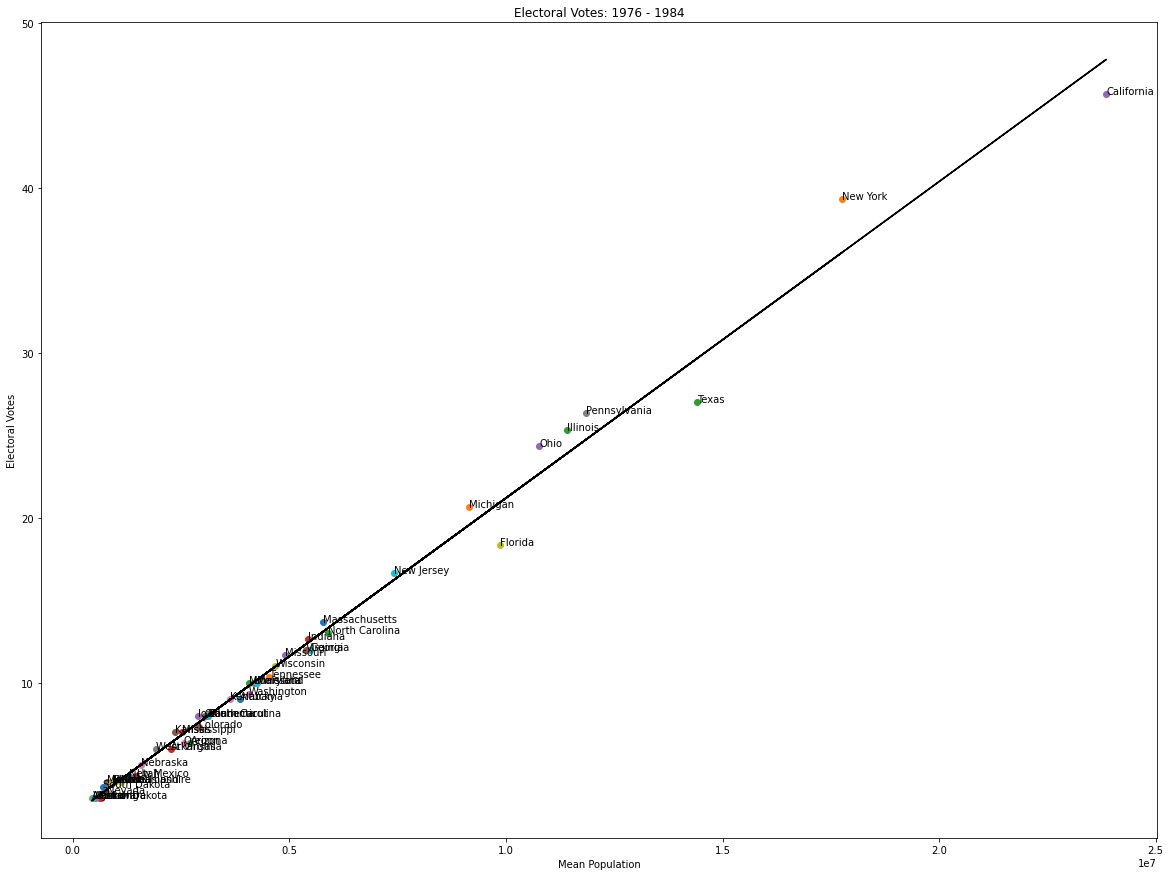

In [88]:
plot_intervals(0, '1976 - 1984')

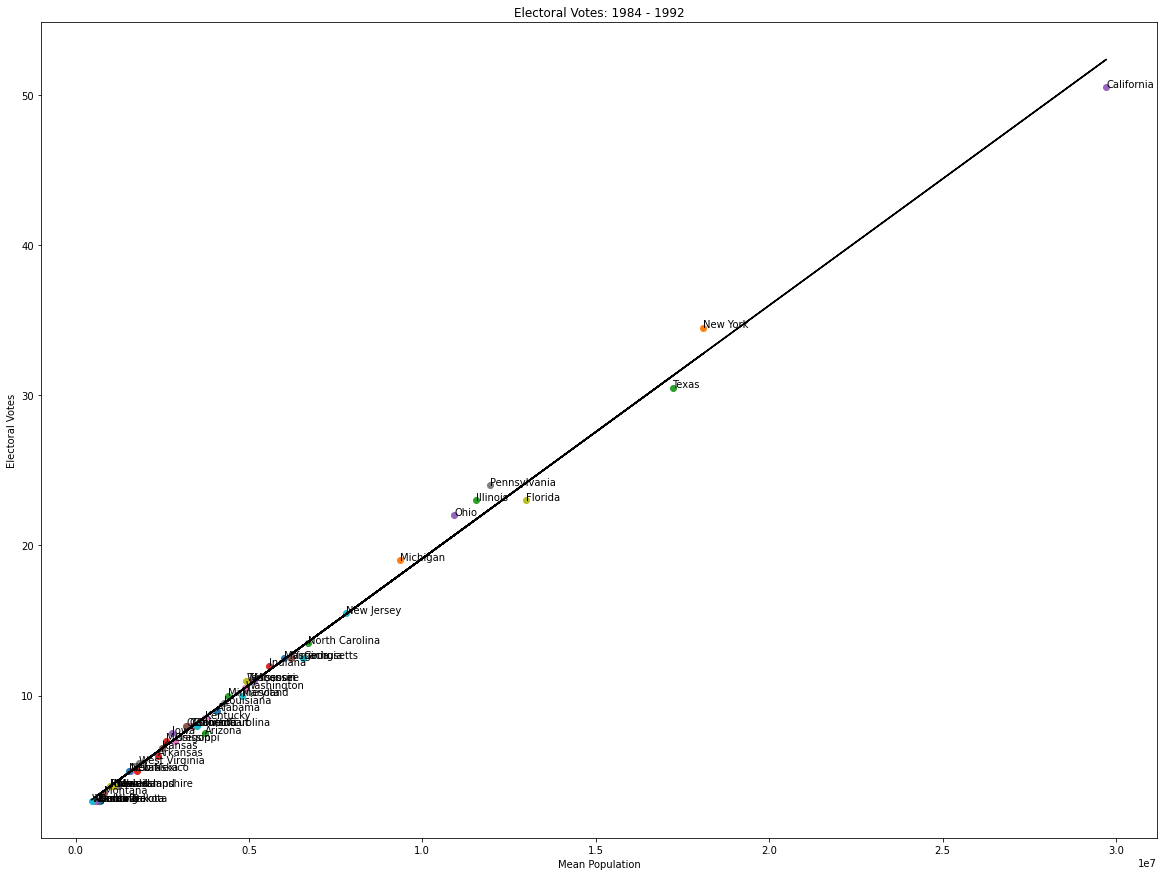

In [89]:
plot_intervals(1, '1984 - 1992')

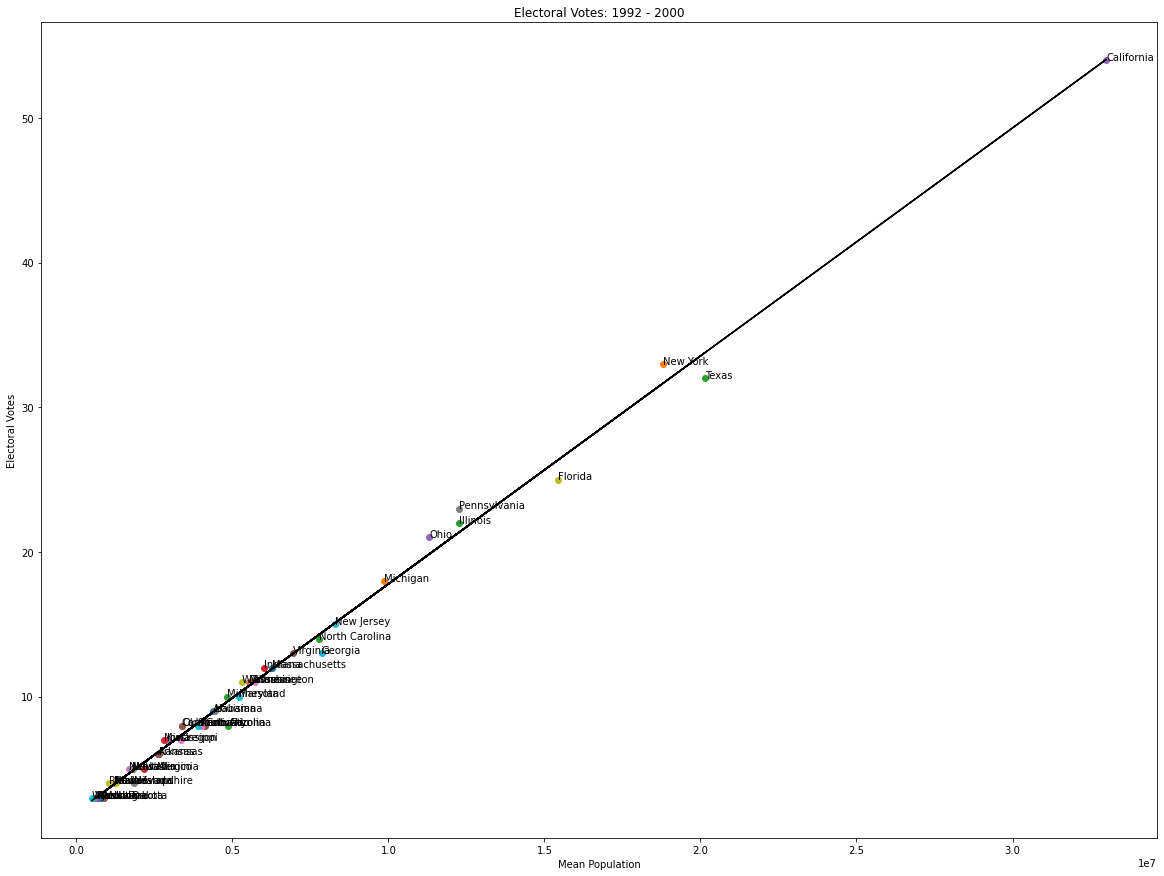

In [90]:
plot_intervals(2, '1992 - 2000')

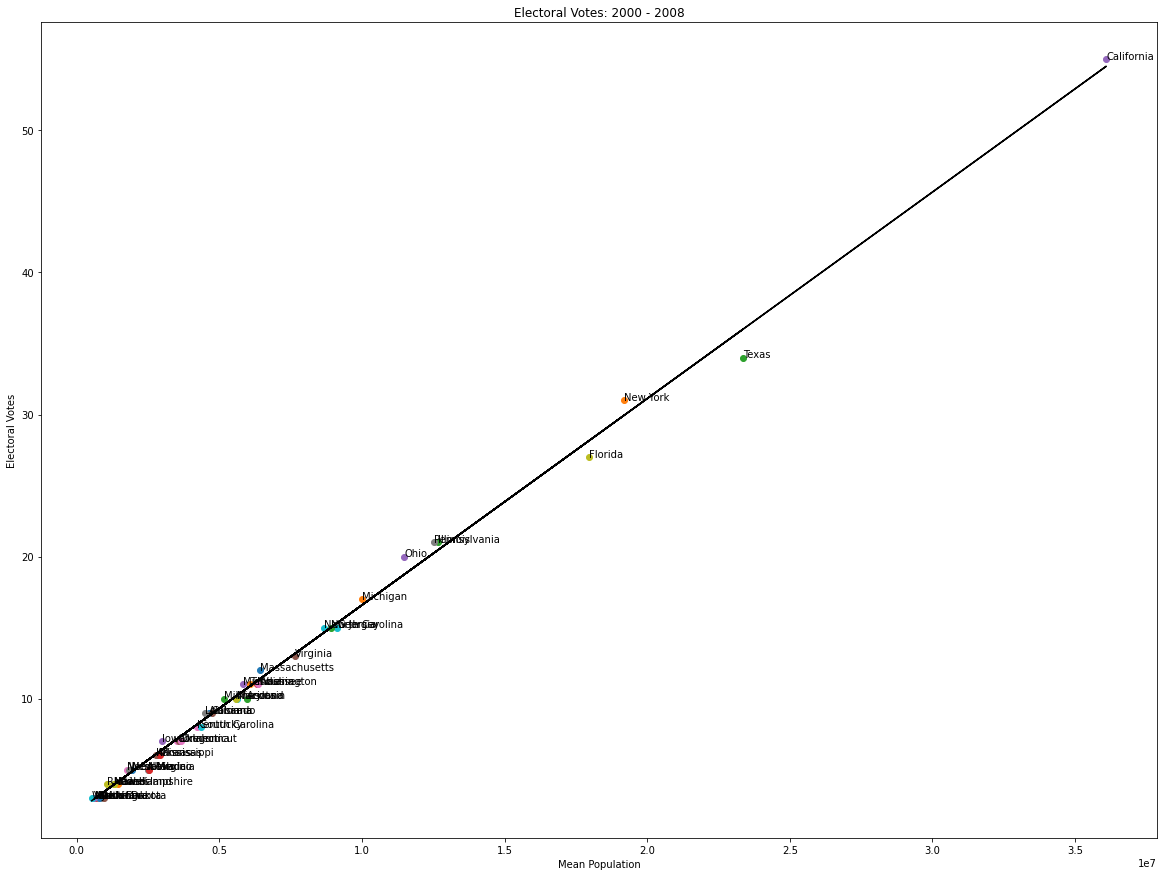

In [91]:
plot_intervals(3, '2000 - 2008')

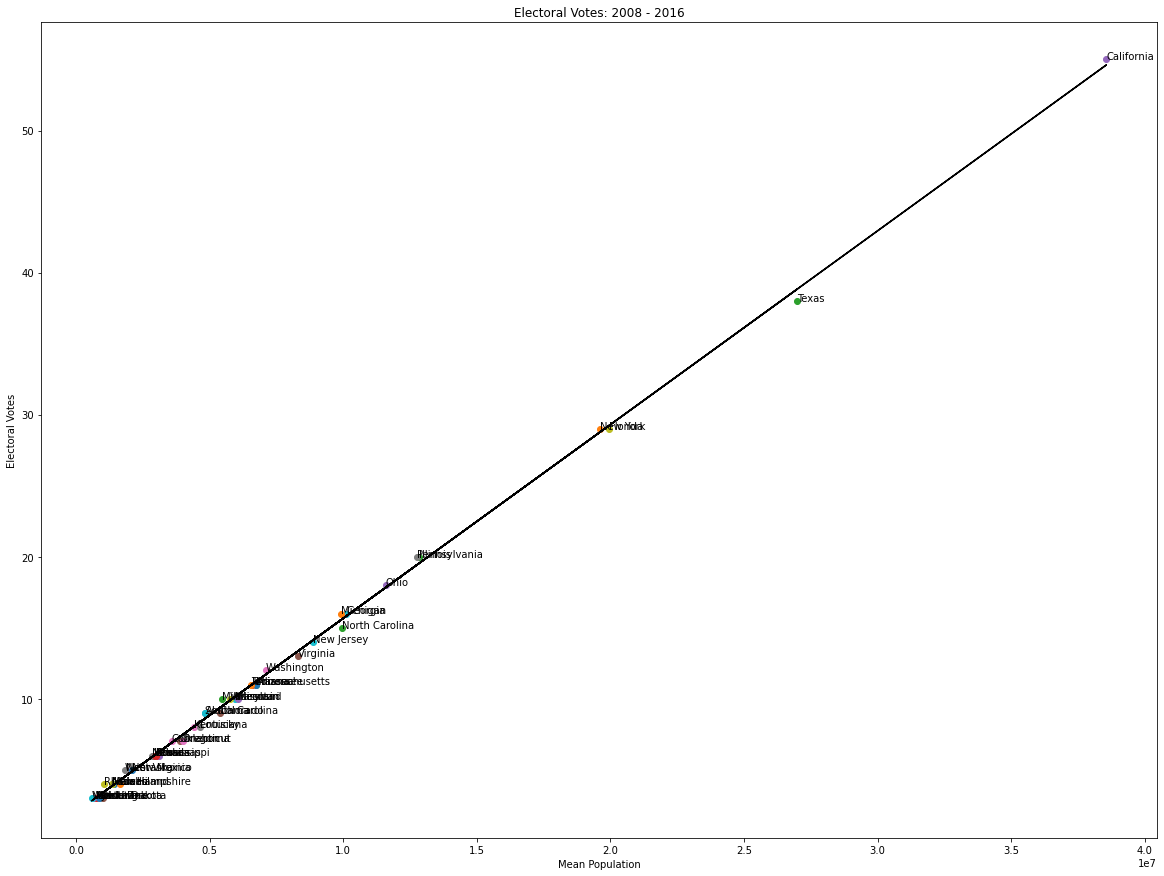

In [92]:
plot_intervals(4, '2008 - 2016')

In [101]:
average = pd.DataFrame({
'average_pop': total_pop.groupby(['state'])['total_pop'].mean(),
'average_evotes': total_pop.groupby(['state'])['votes'].mean()
}).dropna().reset_index()

### Hypothesis Testing

To examine the relationship between the number of votes per states and the state's total population, we shall conduct a hypothesis test.

In [102]:
from statsmodels.formula.api import ols

In [104]:
reg = ols(formula='average_evotes ~ average_pop', data=average).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         average_evotes   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     8878.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           3.93e-56
Time:                        01:45:34   Log-Likelihood:                -51.494
No. Observations:                  50   AIC:                             107.0
Df Residuals:                      48   BIC:                             110.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1342      0.134     15.982      

Using the statsmodel library, we see the regression results of the dataset that takes into account the mean population per state(x-value) and the number of electoral votes per state(y-value). We take $\beta_1$ to be the coefficient of the x-value. We are testing this at a 5% significance level, therefore, $\alpha = 0.05$.

##### Hypothesis:
$H_0$: $\beta_1$ = 0 (null)


$H_a$: $\beta_1 \neq 0$ (alternate)


##### Decision Rule:
If the p-value of $\beta_1$ (average_pop) is greater than the significance level, we fail to reject the null hypothesis.

If the p-value of $\beta_1$ (average_pop) is less than the significance level, we reject the null hypothesis.


##### Test Statisitc:
p-value = 0.000

We clearly see that p-value $< \alpha$.

##### Conclusion:
Since we found the p-value to be less than the significance level, we fail to reject the null hypothesis. This means that we can conclude by saying there is a strong linear relationship between the population of a state and the electoral votes for that state.
